In [174]:
import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

import pickle

from sklearn import metrics
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [175]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)
df_test_features = pd.read_csv('kc_house_data_test_features.csv', index_col=0)

In [176]:
df_untouched = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [177]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [178]:
df.shape

(17290, 21)

In [179]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [180]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131e02080>]],
      dtype=object)

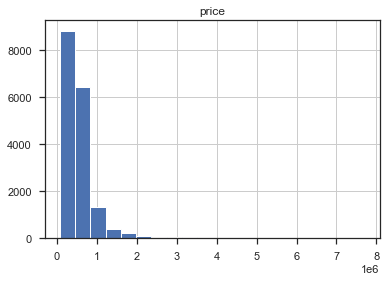

In [181]:
sns.set_style('ticks')
df.hist('price', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bcde748>]],
      dtype=object)

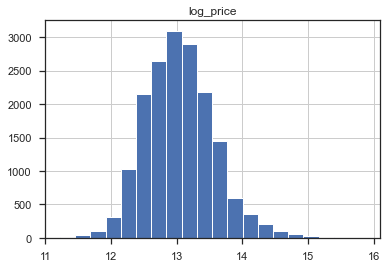

In [182]:
df['log_price'] = df['price'].apply(lambda x: np.log(x))
df.hist('log_price', bins=20)

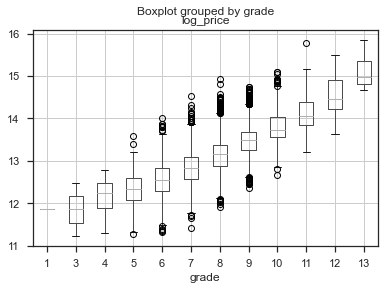

In [183]:
df.boxplot('log_price', 'grade')

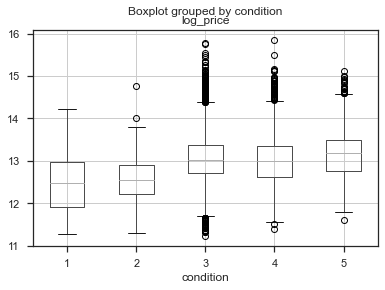

In [184]:
df.boxplot('log_price', 'condition')

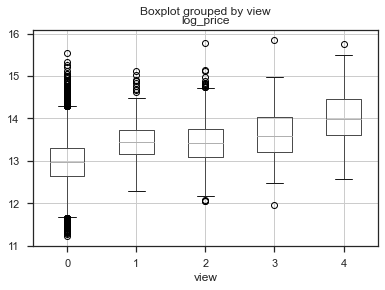

In [185]:
df.boxplot('log_price', 'view')

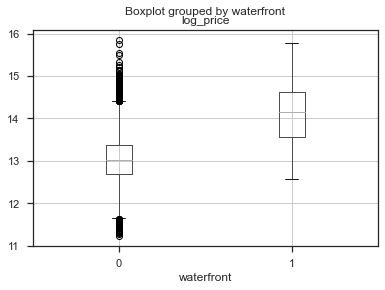

In [186]:
df.boxplot('log_price', 'waterfront')

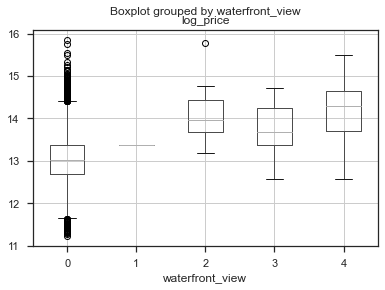

In [187]:
df['waterfront_view'] = df['waterfront'] * df['view']
df.boxplot('log_price', 'waterfront_view')

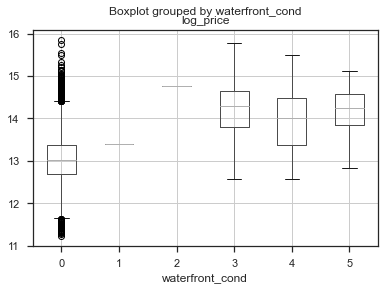

In [188]:
df['waterfront_cond'] = df['waterfront'] * df['condition']
df.boxplot('log_price', 'waterfront_cond')

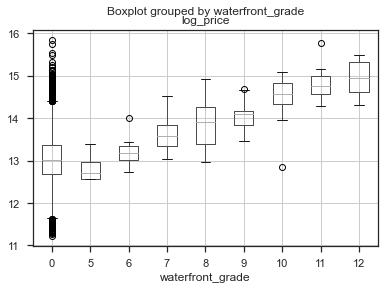

In [189]:
df['waterfront_grade'] = df['waterfront'] * df['grade']
df.boxplot('log_price', 'waterfront_grade')

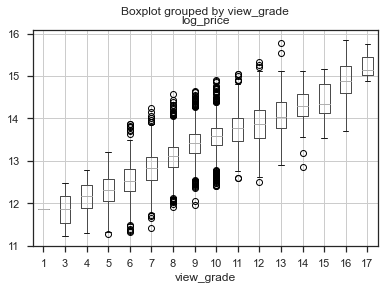

In [190]:
df['view_grade'] = df['view'] + df['grade']
df.boxplot('log_price', 'view_grade')

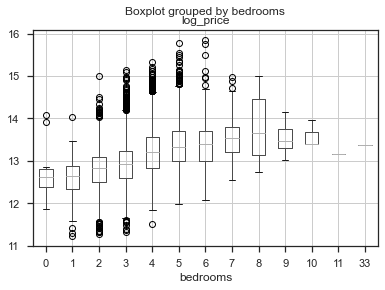

In [191]:
df.boxplot('log_price', 'bedrooms')

In [192]:
df['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [193]:
conditions = [df['bedrooms'] == 0, df['bedrooms'] > 7]
choices = [1, 7]

df['bedrooms'] = np.select(conditions, choices, df['bedrooms'])

In [194]:
df['bedrooms'].value_counts()

3    7864
4    5488
2    2204
5    1283
6     229
1     172
7      50
Name: bedrooms, dtype: int64

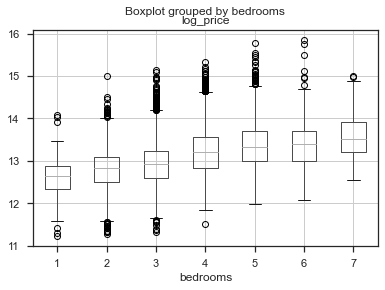

In [195]:
df.boxplot('log_price', 'bedrooms')

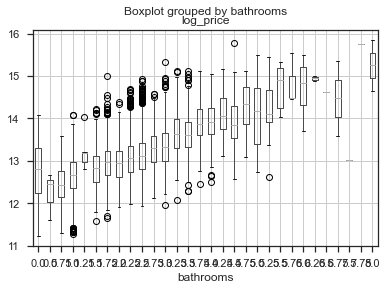

In [196]:
df.boxplot('log_price', 'bathrooms')

In [197]:
df['bathrooms'].unique()

array([2.25, 3.  , 2.5 , 3.5 , 2.  , 1.  , 1.75, 3.75, 3.25, 4.25, 2.75,
       1.5 , 4.5 , 4.  , 4.75, 0.75, 0.  , 5.  , 5.5 , 6.  , 1.25, 5.75,
       6.75, 5.25, 6.5 , 8.  , 7.5 , 6.25, 0.5 , 7.75])

In [198]:
conditions = [df['bathrooms'] <= 1, df['bathrooms'] <= 1.75,
              df['bathrooms'] <= 2, df['bathrooms'] <= 2.75,
              df['bathrooms'] <= 3, df['bathrooms'] <= 3.75,
              df['bathrooms'] <= 4, df['bathrooms'] <= 4.75]
choices = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

df['bathrooms'] = np.select(conditions, choices, 5)

In [199]:
df['bathrooms'].value_counts()

2.5    6884
1.5    3605
1.0    3163
2.0    1549
3.5    1181
3.0     592
4.5     156
4.0     107
5.0      53
Name: bathrooms, dtype: int64

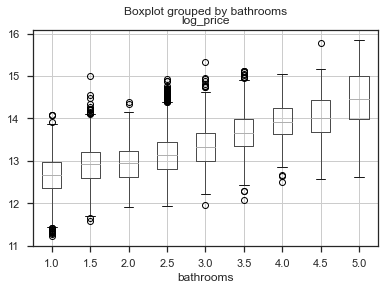

In [200]:
df.boxplot('log_price', 'bathrooms')

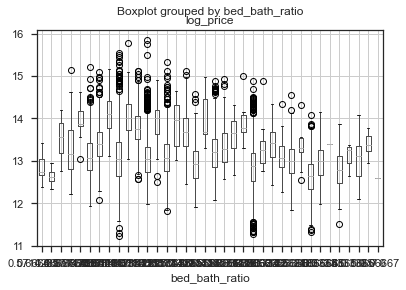

In [201]:
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']
df.boxplot('log_price', 'bed_bath_ratio')

In [202]:
df['living_bed_ratio'] = df['sqft_living'] / df['bedrooms']

In [203]:
df['living_bed_ratio'] = np.where(df['living_bed_ratio'] == np.inf,
                                  df['living_bed_ratio'].min(), df['living_bed_ratio'])


In [204]:
df['log_living_bed_ratio'] = df['living_bed_ratio'].apply(lambda x: np.log(x))

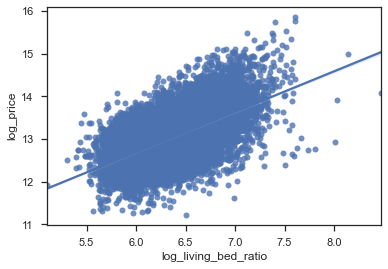

In [205]:
sns.regplot(df['log_living_bed_ratio'], df['log_price'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


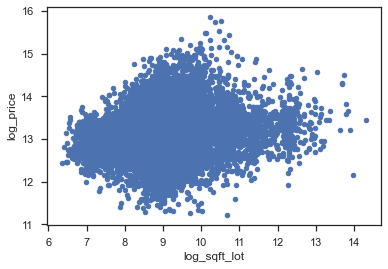

In [206]:
df['log_sqft_lot'] = df['sqft_lot'].apply(lambda x: np.log(x))
df.plot.scatter('log_sqft_lot', 'log_price')

In [207]:
df['sqft_yard'] = df['sqft_lot'] - (df['sqft_living'] / df['floors'])
df['sqft_yard'] = np.where(df['sqft_yard'] < 0, df['sqft_yard'].median(), df['sqft_yard'])
df['sqft_yard'].min(), df['sqft_yard'].max()

(21.66666666666663, 1650059.0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


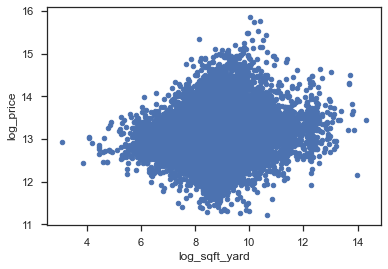

In [208]:
df['log_sqft_yard'] = df['sqft_yard'].apply(lambda x: np.log(x))
df.plot.scatter('log_sqft_yard', 'log_price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a5eae80>]],
      dtype=object)

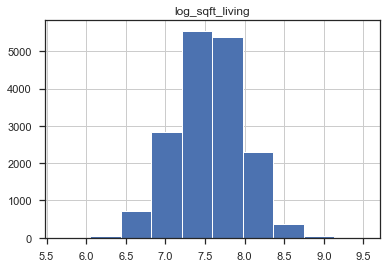

In [209]:
df['log_sqft_living'] = df['sqft_living'].apply(lambda x: np.log(x))
df.hist('log_sqft_living')

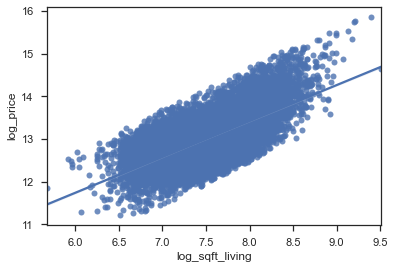

In [210]:
sns.regplot(df['log_sqft_living'], df['log_price'])

In [211]:
f = 'log_price~log_sqft_living+log_sqft_yard'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     7534.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        16:29:14   Log-Likelihood:                -8034.7
No. Observations:               17290   AIC:                         1.608e+04
Df Residuals:                   17287   BIC:                         1.610e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.8665      0.053    128.748      0.000       6.762       6.971
log_sqft_living     0.8720      0.007    121.413      0.000       0.858       0.886
log_sqft_yard      -0.0461      0.003    -15.821      0.000      -0.052      -0.040
==============================================================================
Omnibus:                       77.310   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.161
Skew:                           0.154   Prob(JB):                     1.76e-17
Kurtosis:                       2.890   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
df['yr_built_reno'] = np.where(df['yr_renovated'] == 0, df['yr_built'], df['yr_renovated'])
df['yr_built_reno'].describe()

count    17290.000000
mean      1973.158010
std         28.805976
min       1900.000000
25%       1954.000000
50%       1977.000000
75%       1999.000000
max       2015.000000
Name: yr_built_reno, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


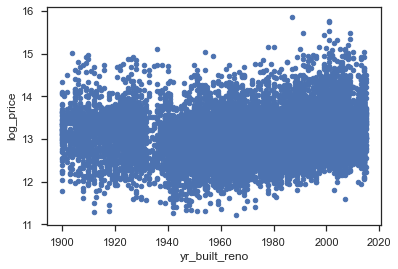

In [213]:
df.plot.scatter('yr_built_reno', 'log_price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


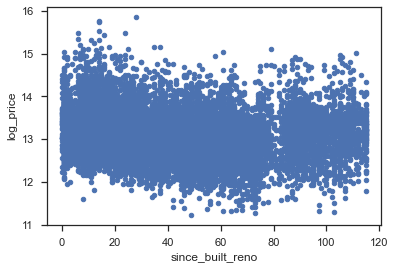

In [214]:
df['since_built_reno'] = df['yr_built_reno'].apply(lambda x: 2015 - x)
df.plot.scatter('since_built_reno', 'log_price')

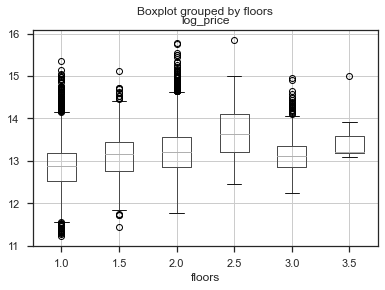

In [215]:
df.boxplot('log_price', 'floors')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


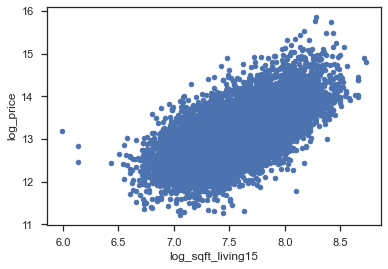

In [216]:
df['log_sqft_living15'] = df['sqft_living15'].apply(lambda x: np.log(x))
df.plot.scatter('log_sqft_living15', 'log_price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


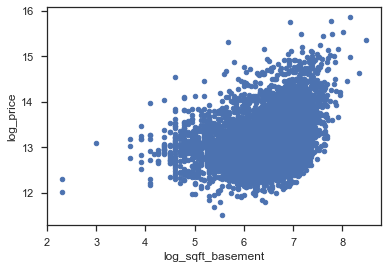

In [217]:
df['log_sqft_basement'] = df['sqft_basement'].apply(lambda x: np.log(x))
df.plot.scatter('log_sqft_basement', 'log_price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


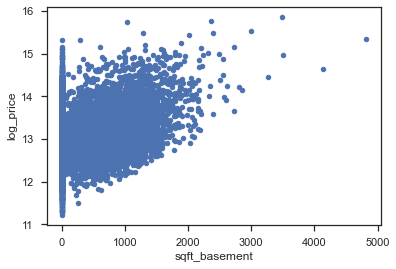

In [218]:
df.plot.scatter('sqft_basement', 'log_price')

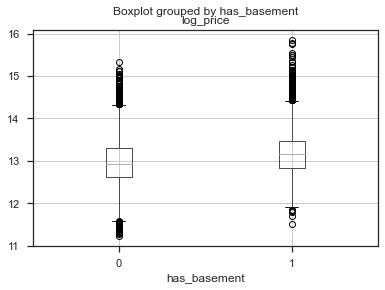

In [219]:
df['has_basement'] = np.where(df['sqft_basement'] == 0, 0, 1)
df.boxplot('log_price', 'has_basement')

In [220]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price',
       'waterfront_view', 'waterfront_cond', 'waterfront_grade', 'view_grade',
       'bed_bath_ratio', 'living_bed_ratio', 'log_living_bed_ratio',
       'log_sqft_lot', 'sqft_yard', 'log_sqft_yard', 'log_sqft_living',
       'yr_built_reno', 'since_built_reno', 'log_sqft_living15',
       'log_sqft_basement', 'has_basement'],
      dtype='object')

In [221]:
df['cond_squared'] = df['condition']**2
df['cond_cubed'] = df['condition']**3

In [222]:
f_cond = 'price~condition+cond_squared+cond_cubed+log_sqft_living'
model_cond = ols(formula=f_cond, data=df).fit()
model_cond.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     2612.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        16:34:03   Log-Likelihood:            -2.4228e+05
No. Observations:               17290   AIC:                         4.846e+05
Df Residuals:                   17285   BIC:                         4.846e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.323e+06   1.39e+05    -23.932      0.000    -3.6e+06   -3.05e+06
condition       -1.493e+05   1.16e+05     -1.290      0.197   -3.76e+05    7.75e+04
cond_squared     2.262e+04   3.26e+04      0.693      0.488   -4.13e+04    8.65e+04
cond_cubed        429.1689   3033.470      0.141      0.887   -5516.740    6375.078
log_sqft_living  5.405e+05   5323.172    101.529      0.000     5.3e+05    5.51e+05
==============================================================================
Omnibus:                    16400.167   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1674157.084
Skew:                           4.300   Prob(JB):                         0.00
Kurtosis:                      50.433   Cond. No.                     4.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# columns = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'zipcode']
columns = ['bedrooms', 'bathrooms', 'floors', 'condition']
df = pd.get_dummies(data=df, columns=columns, prefix=columns, drop_first=True)
df.columns

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=138)

In [49]:
floor_dict = {
            'floors_1.5': 'floors_1_half',
            'floors_2.0': 'floors_2',
            'floors_2.5': 'floors_2_half',
            'floors_3.0': 'floors_3',
            'floors_3.5': 'floors_3_half'
}

df = df.rename(columns=floor_dict)

In [50]:
print(df.columns)

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=138)


In [51]:
bath_dict = {
            'bathrooms_1.0': 'bathrooms_1',
            'bathrooms_1.5': 'bathrooms_1_half',
            'bathrooms_2.0': 'bathrooms_2',
            'bathrooms_2.5': 'bathrooms_2_half',
            'bathrooms_3.0': 'bathrooms_3',
            'bathrooms_3.5': 'bathrooms_3_half',
            'bathrooms_4.0': 'bathrooms_4',
            'bathrooms_4.5': 'bathrooms_4_half',
            'bathrooms_5.0': 'bathrooms_5'
}

df = df.rename(columns=bath_dict)

In [52]:
df.shape

(17290, 138)

In [53]:
df_untouched.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [54]:
untouched_cats = '+'.join(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                           'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
                           'yr_renovated', 'sqft_living15', 'sqft_lot15'])

In [55]:
f_untouched = 'price~' + untouched_cats
model_untouched = ols(formula=f_untouched, data=df_untouched).fit()
model_untouched.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2328.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        16:11:35   Log-Likelihood:            -2.3720e+05
No. Observations:               17290   AIC:                         4.744e+05
Df Residuals:                   17275   BIC:                         4.746e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.239e+06   1.57e+05     39.635      0.000    5.93e+06    6.55e+06
bedrooms      -3.877e+04   2263.064    -17.133      0.000   -4.32e+04   -3.43e+04
bathrooms      4.534e+04   3963.126     11.440      0.000    3.76e+04    5.31e+04
sqft_living     112.0537      2.755     40.674      0.000     106.654     117.454
sqft_lot         -0.0143      0.056     -0.257      0.797      -0.124       0.095
floors         2.525e+04   4302.548      5.868      0.000    1.68e+04    3.37e+04
waterfront     5.911e+05   2.07e+04     28.581      0.000    5.51e+05    6.32e+05
view           4.291e+04   2559.474     16.765      0.000    3.79e+04    4.79e+04
condition      2.001e+04   2831.563      7.066      0.000    1.45e+04    2.56e+04
grade          1.197e+05   2564.254     46.667      0.000    1.15e+05    1.25e+05
sqft_above       53.4308      2.691     19.858      0.000      48.157      58.705
sqft_basement    58.6229      3.158     18.563      0.000      52.433      64.813
yr_built      -3598.3856     80.746    -44.564      0.000   -3756.655   -3440.116
yr_renovated      7.7960      4.459      1.748      0.080      -0.944      16.536
sqft_living15    25.9149      4.100      6.321      0.000      17.879      33.951
sqft_lot15       -0.5011      0.087     -5.735      0.000      -0.672      -0.330
==============================================================================
Omnibus:                    13715.606   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1138040.667
Skew:                           3.235   Prob(JB):                         0.00
Kurtosis:                      42.215   Cond. No.                     1.68e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [149]:
df.columns[55:70
          ]

Index(['condition_3', 'condition_4', 'condition_5', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'zipcode_98002'],
      dtype='object')

# FEATURES CREATION

In [151]:
features = df.drop(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
                    'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'living_bed_ratio',
                    'bed_bath_ratio', 'log_sqft_lot', 'sqft_yard', 'yr_built_reno', 'log_sqft_living15',
                    'log_sqft_basement', 
                    'waterfront_view', 'waterfront_cond', 'waterfront_grade',
                    'log_living_bed_ratio', 'view_1', 'view_2', 'view_3', 'view_4',
                    'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13',
#                     'view_grade',
                    'since_built_reno'                    
                   ], 
                    axis = 1)

In [152]:
features.columns

Index(['waterfront', 'log_price', 'view_grade', 'log_sqft_yard',
       'log_sqft_living', 'has_basement', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7',
       'bathrooms_1_half', 'bathrooms_2', 'bathrooms_2_half', 'bathrooms_3',
       'bathrooms_3_half', 'bathrooms_4', 'bathrooms_4_half', 'bathrooms_5',
       'floors_1_half', 'floors_2', 'floors_2_half', 'floors_3',
       'floors_3_half', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode

In [153]:
features_list = list(features.columns)
features_list.remove('log_price')
f_list = '+'.join(features_list)

In [154]:
f = 'log_price~' + f_list
model = ols(formula=f, data=features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1299.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        16:22:38   Log-Likelihood:                 4870.0
No. Observations:               17290   AIC:                            -9544.
Df Residuals:                   17192   BIC:                            -8784.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.4763      0.061    123.456      0.000       7.358       7.595
waterfront           0.4257      0.017     25.212      0.000       0.393       0.459
view_grade           0.0851      0.001     59.835      0.000       0.082       0.088
log_sqft_yard        0.0548      0.002     28.407      0.000       0.051       0.059
log_sqft_living      0.4908      0.007     66.411      0.000       0.476       0.505
has_basement        -0.0455      0.004    -12.054      0.000      -0.053      -0.038
bedrooms_2          -0.0478      0.015     -3.258      0.001      -0.077      -0.019
bedrooms_3          -0.0746      0.015     -5.072      0.000      -0.103      -0.046
bedrooms_4          -0.0776      0.015     -5.103      0.000      -0.107      -0.048
bedrooms_5          -0.1039      0.016     -6.446      0.000      -0.135      -0.072
bedrooms_6          -0.1469      0.020     -7.453      0.000      -0.185      -0.108
bedrooms_7          -0.2540      0.031     -8.285      0.000      -0.314      -0.194
bathrooms_1_half     0.0008      0.005      0.151      0.880      -0.009       0.011
bathrooms_2          0.0075      0.006      1.173      0.241      -0.005       0.020
bathrooms_2_half     0.0384      0.006      6.172      0.000       0.026       0.051
bathrooms_3          0.0501      0.010      5.096      0.000       0.031       0.069
bathrooms_3_half     0.1003      0.009     10.928      0.000       0.082       0.118
bathrooms_4          0.1549      0.020      7.864      0.000       0.116       0.194
bathrooms_4_half     0.1558      0.017      9.009      0.000       0.122       0.190
bathrooms_5          0.2269      0.028      8.167      0.000       0.172       0.281
floors_1_half        0.0055      0.006      0.995      0.320      -0.005       0.016
floors_2             0.0014      0.005      0.311      0.756      -0.008       0.011
floors_2_half        0.0434      0.016      2.657      0.008       0.011       0.075
floors_3            -0.0872      0.010     -8.402      0.000      -0.108      -0.067
floors_3_half       -0.0003      0.070     -0.004      0.997      -0.137       0.136
condition_2          0.1575      0.041      3.877      0.000       0.078       0.237
condition_3          0.2681      0.038      7.111      0.000       0.194       0.342
condition_4          0.2986      0.038      7.915      0.000       0.225       0.373
condition_5          0.3655      0.038      9.624      0.000       0.291       0.440
zipcode_98002       -0.0185      0.018     -1.012      0.312      -0.054       0.017
zipcode_98003        0.0100      0.016      0.609      0.542      -0.022       0.042
zipcode_98004        1.1727      0.016     72.045      0.000       1.141       1.205
zipcode_98005        0.7610      0.019     40.002      0.000       0.724       0.798
zipcode_98006        0.

# TRAIN-TEST SPLIT!!!

In [155]:
target = features['log_price']
features_only = features.drop(['log_price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features_only, target, random_state=22, test_size=0.2)
# random_state=22,

In [156]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=features_list)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=features_list)

## "Standard" model

In [157]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = np.exp(lm.predict(X_train))

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

y_pred = np.exp(lm.predict(X_test))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

Training Root Mean Squared Error: 629090.5211731809
Testing Root Mean Squared Error: 625203.7480080308
Training:  629090.5211731809 vs. Testing:  625203.7480080308


## F-Test

In [158]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [159]:
selected_columns

Index(['waterfront', 'view_grade', 'log_sqft_living', 'has_basement',
       'bedrooms_3', 'bedrooms_4', 'bathrooms_3_half', 'floors_2',
       'zipcode_98004', 'zipcode_98040'],
      dtype='object')

In [160]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = np.exp(lm_kbest.predict(X_train[selected_columns]))


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = np.exp(lm_kbest.predict(X_test[selected_columns]))

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)

Training Root Mean Squared Error: 595838.0021479973
Testing Root Mean Squared Error: 588188.3794626169
Original:  625203.7480080308 vs. KBest:  588188.3794626169


In [161]:
f_list_selected = '+'.join(features[selected_columns].columns)
f_selected = 'log_price~' + f_list_selected
model_selected = ols(formula=f_selected, data=features).fit()
model_selected.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2666.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        16:22:58   Log-Likelihood:                -5384.6
No. Observations:               17290   AIC:                         1.079e+04
Df Residuals:                   17279   BIC:                         1.088e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.6364      0.061    141.125      0.000       8.516       8.756
waterfront           0.1882      0.030      6.327      0.000       0.130       0.247
view_grade           0.1410      0.002     59.775      0.000       0.136       0.146
log_sqft_living      0.4400      0.010     46.010      0.000       0.421       0.459
has_basement         0.0565      0.006      9.744      0.000       0.045       0.068
bedrooms_3          -0.0837      0.006    -12.884      0.000      -0.096      -0.071
bedrooms_4          -0.0671      0.007     -9.056      0.000      -0.082      -0.053
bathrooms_3_half     0.0860      0.011      7.953      0.000       0.065       0.107
floors_2            -0.0223      0.006     -3.514      0.000      -0.035      -0.010
zipcode_98004        0.6605      0.022     30.306      0.000       0.618       0.703
zipcode_98040        0.3816      0.022     17.143      0.000       0.338       0.425
==============================================================================
Omnibus:                        7.183   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.053
Skew:                          -0.036   Prob(JB):                       0.0294
Kurtosis:                       2.933   Cond. No.                         274.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Recursive Feature Elimination

In [162]:
from sklearn import linear_model
from sklearn.feature_selection import RFECV

rfe = linear_model.LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=rfe, step=1, cv=10, scoring='neg_mean_squared_error')
# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [163]:
selected_rfe

Index(['waterfront', 'view_grade', 'log_sqft_yard', 'log_sqft_living',
       'has_basement', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bathrooms_2', 'bathrooms_2_half',
       'bathrooms_3', 'bathrooms_3_half', 'bathrooms_4', 'bathrooms_4_half',
       'bathrooms_5', 'floors_2_half', 'floors_3', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'zipcode_98002',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'z

In [164]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = np.exp(lm_rfe.predict(X_train[selected_rfe]))


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = np.exp(lm_rfe.predict(X_test[selected_rfe]))

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse, "vs. RFE: ", testRFE_rmse)

Training Root Mean Squared Error: 629133.0444797729
Testing Root Mean Squared Error: 625238.6130868649
Original:  625203.7480080308 vs. KBest:  588188.3794626169 vs. RFE:  625238.6130868649


## LASSO

Training Error: 485231.88931991
Testing Error: 512479.19639044465


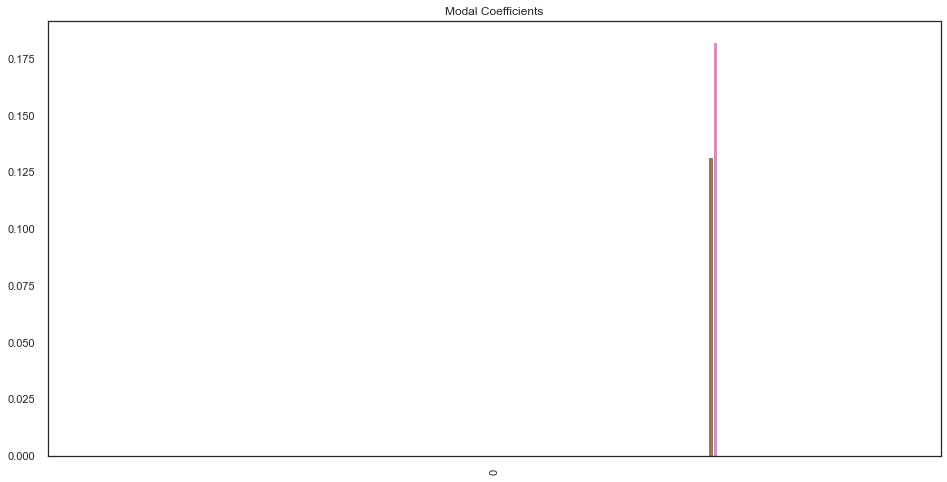

In [167]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred_lasso = np.exp(lasso.predict(X_train))
y_pred_lasso = np.exp(lasso.predict(X_test))

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [168]:
coefficient = lasso_coef01.T
coefficient[coefficient[0] != 0]

,0
log_sqft_living,0.131531
view_grade,0.182412


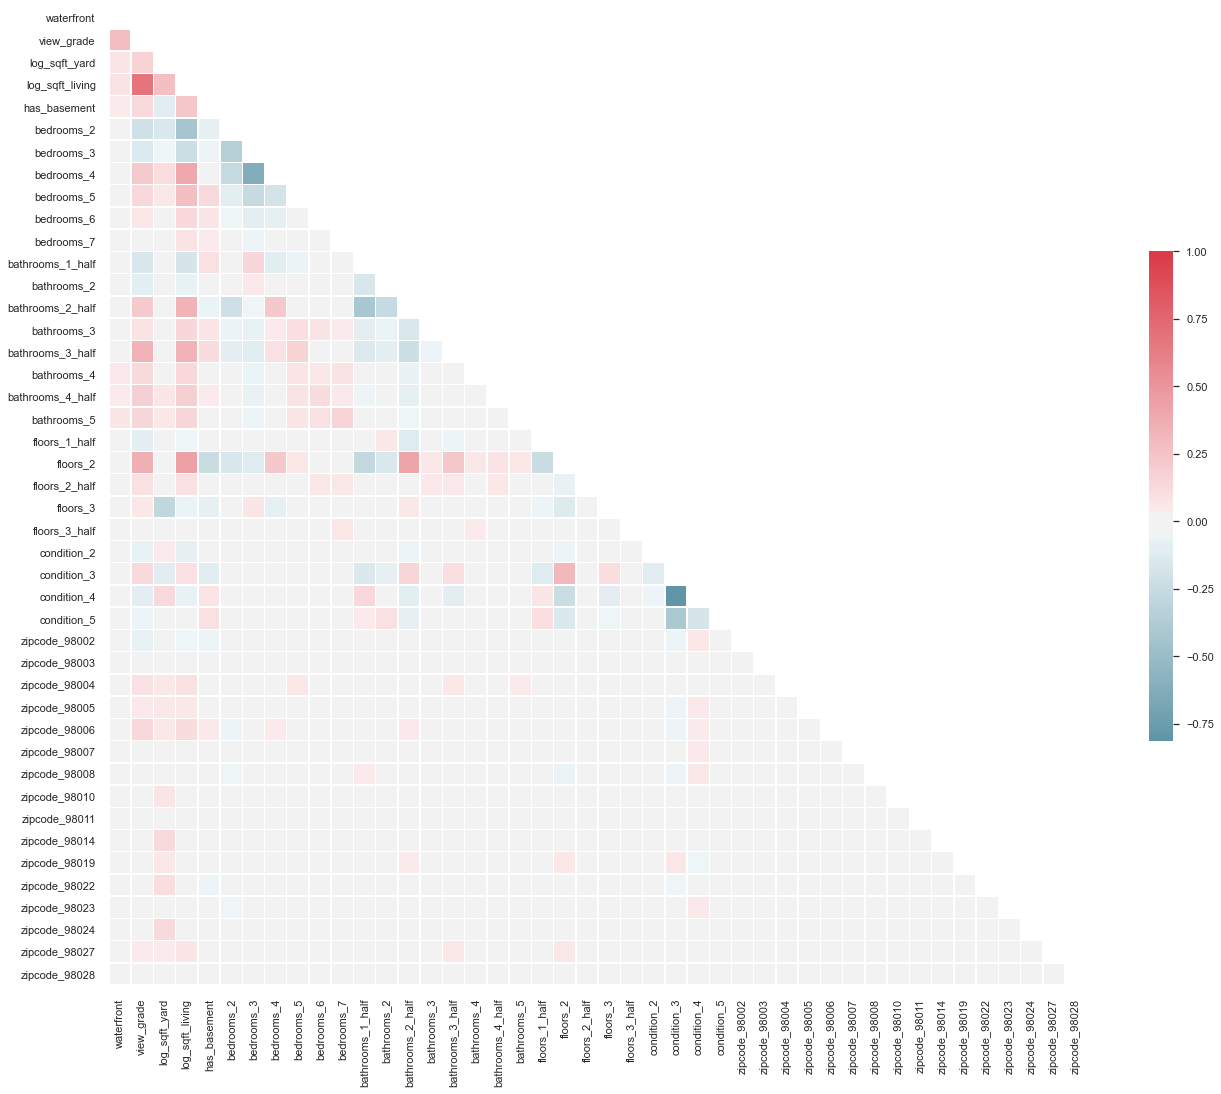

In [169]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_train.iloc[:,:44].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

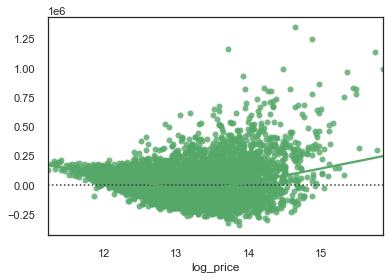

In [171]:
sns.residplot( y_train, y_train_pred_lasso,lowess=True, color="g")

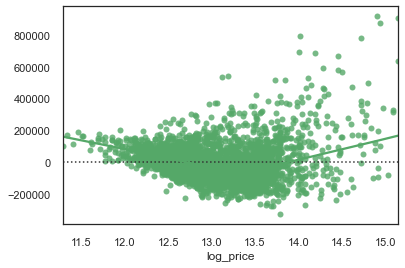

In [172]:
sns.residplot( y_test, y_pred_lasso, lowess=True, color="g")

In [76]:
features['log_sqft_living'].corr(features['log_living_bed_ratio'])

0.7418463942795088

In [170]:
features['log_sqft_living'].corr(features['view_grade'])

0.6826325484974923

# FITTING TO FULL DATA

In [78]:
final_scaler = StandardScaler()
final_scaler.fit_transform(features[selected_columns])

array([[ 6.86013404e-02, -3.87254749e-01,  1.97941685e-01, ...,
        -3.71717526e-01, -2.33369197e-01, -1.37101316e-01],
       [ 6.86013404e-02, -3.55096022e-02,  9.93220106e-01, ...,
        -3.71717526e-01, -2.33369197e-01, -1.37101316e-01],
       [ 3.27259155e+00,  1.46227278e+00,  1.61206967e+00, ...,
        -3.71717526e-01, -2.33369197e-01,  7.29387599e+00],
       ...,
       [-5.72196701e-01, -1.59371792e+00, -1.40307425e+00, ...,
        -3.71717526e-01, -2.33369197e-01, -1.37101316e-01],
       [-5.72196701e-01,  2.35872390e-01, -4.19003874e-03, ...,
        -3.71717526e-01, -2.33369197e-01, -1.37101316e-01],
       [-5.72196701e-01, -8.64463033e-01, -8.45494151e-01, ...,
        -3.71717526e-01, -2.33369197e-01, -1.37101316e-01]])

In [79]:
final_model = LinearRegression()
final_model.fit(features[selected_columns], target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## POLYNOMIALS??

In [80]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [81]:
create_polynomial_regression_model(3)

KeyboardInterrupt: 

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train[['']])

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y_train, y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
X_train, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [ ]:
features.columns[0:20]

In [ ]:
features.columns[20:46]